In [4]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read File CSV
df = pd.read_csv('amazon_global_sales_cleaned.csv')

In [6]:
# check the number of rows and columns
print("Number of rows and columns:", df.shape)

Number of rows and columns: (25739, 24)


In [7]:
# check the first 5 lines
print("5 first line:")
print(df.head())

5 first line:
   row_id                  order_id  order_date   ship_date     ship_mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  13/11/2014   First Class   
1   26341    IN-2014-JR162107-41675  05/02/2014  07/02/2014  Second Class   
2   25330    IN-2014-CR127307-41929  17/10/2014  18/10/2014   First Class   
3   13524   ES-2014-KM1637548-41667  28/01/2014  30/01/2014   First Class   
4   47221   SG-2014-RH9495111-41948  05/11/2014  06/11/2014      Same Day   

    customer_id     customer_name      segment           city  \
0  AB-100151402     Aaron Bergman     Consumer  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate     Wollongong   
2     CR-127307      Craig Reiter     Consumer       Brisbane   
3    KM-1637548  Katherine Murray  Home Office         Berlin   
4    RH-9495111       Rick Hansen     Consumer          Dakar   

             state  ...    category sub-category  \
0         Oklahoma  ...  Technology       Phones   
1  New South Wales  ...   Fu

In [8]:
# Cek missing value
print(df.isnull().sum())

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
region            0
market            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
age               0
dtype: int64


In [9]:
# Check for duplicate data
print("Number of rows duplicated:", df.duplicated().sum())

Number of rows duplicated: 0


          category         sales
0       Technology  3.788764e+06
1        Furniture  3.289717e+06
2  Office Supplies  2.524879e+06


/tmp/ipython-input-10-2095661907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=sales_by_category, palette='Blues_d')


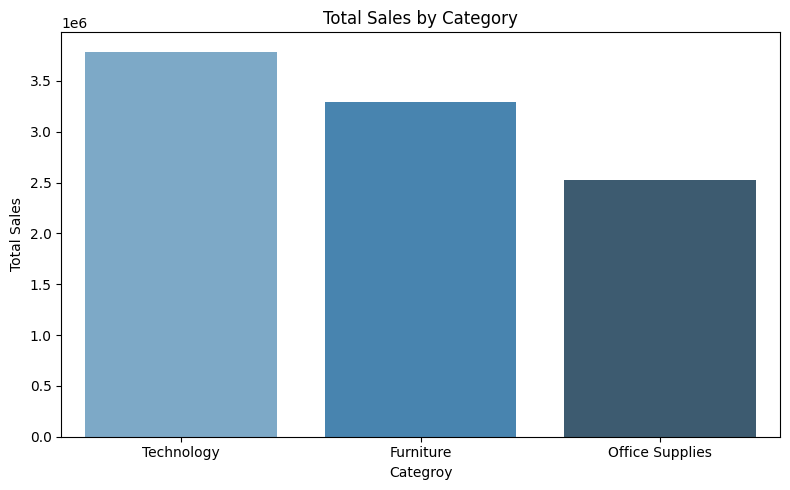

In [10]:
# Penjualan berdasarkan Category
sales_by_category = df.groupby('category')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).reset_index(drop=True)
print(sales_by_category)
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='sales', data=sales_by_category, palette='Blues_d')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Categroy')
plt.tight_layout()
plt.show()


   sub-category         sales
0        Phones  1.393087e+06
1       Copiers  1.262144e+06
2     Bookcases  1.207404e+06
3        Chairs  1.201052e+06
4    Appliances  8.480623e+05
5       Storage  8.050922e+05
6        Tables  6.576803e+05
7      Machines  6.051998e+05
8   Accessories  5.283325e+05
9       Binders  2.854092e+05
10  Furnishings  2.235799e+05
11          Art  1.883868e+05
12     Supplies  1.388485e+05
13        Paper  1.165051e+05
14    Envelopes  7.784783e+04
15    Fasteners  3.501587e+04
16       Labels  2.971070e+04


/tmp/ipython-input-11-2078170499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_subcat, x='sales', y='sub-category', palette='Blues_d')


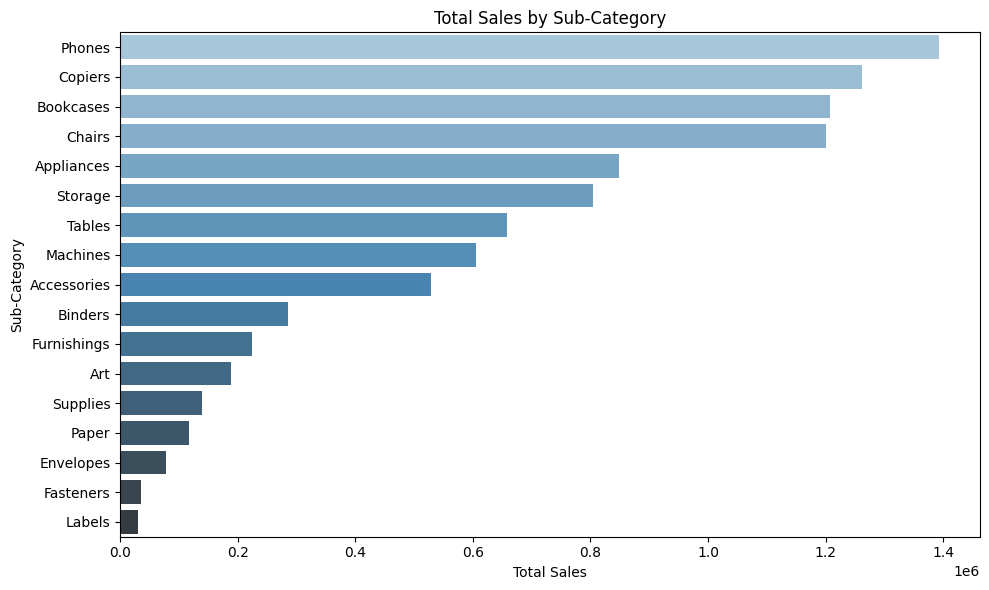

In [11]:
# Penjualan berdasarkan Sub-Category
sales_by_subcat = df.groupby('sub-category')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).reset_index(drop=True)
print(sales_by_subcat)
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_subcat, x='sales', y='sub-category', palette='Blues_d')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

       segment         sales
0     Consumer  4.962813e+06
1    Corporate  2.900891e+06
2  Home Office  1.739654e+06


/tmp/ipython-input-12-1197694721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_segment, x='segment', y='sales', palette='Blues_d')


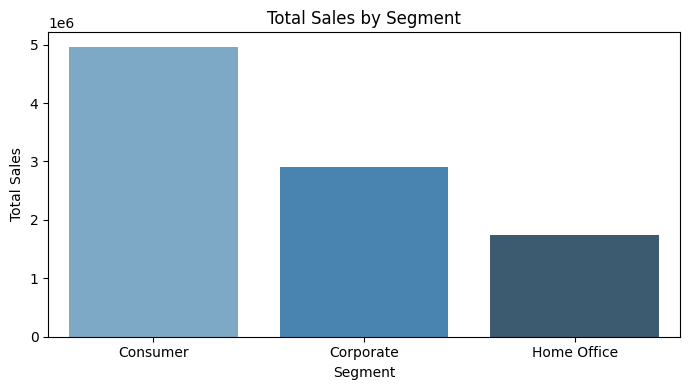

In [12]:
#Penjualan berdasarkan Segemnt
sales_by_segment = (df.groupby('segment')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)).reset_index(drop=True)
print(sales_by_segment)
plt.figure(figsize=(7,4))
sns.barplot(data=sales_by_segment, x='segment', y='sales', palette='Blues_d')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

       segment        sales
0     Consumer  200402.4550
1    Corporate  126935.6655
2  Home Office   70589.9069


/tmp/ipython-input-13-2601563379.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_by_bottom5, y='sales', x='segment', palette='Blues_d')


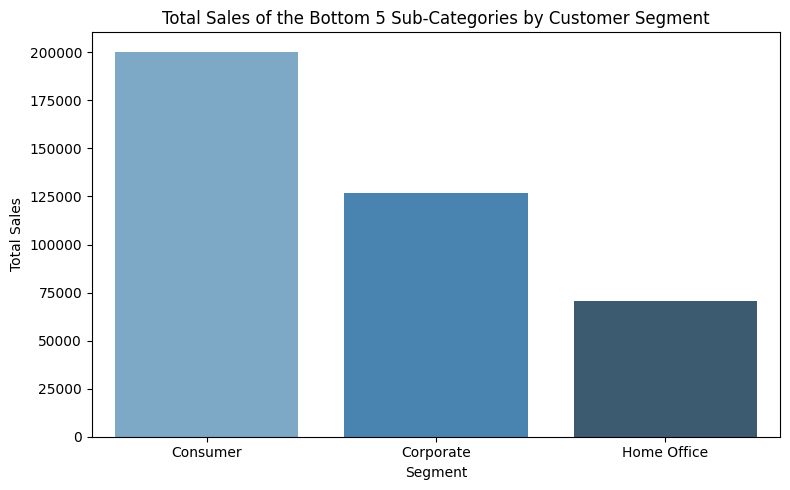

In [13]:
sales_subcat_bottom5 = sales_by_subcat.tail(5)

# Ambil list sub-category 5 terbawah
bottom5_subcats = sales_subcat_bottom5['sub-category'].tolist()

# Filter data utama berdasarkan sub-category tersebut
bottom5_data = df[df['sub-category'].isin(bottom5_subcats)]

# Hitung total sales berdasarkan segment untuk 5 sub-category terbawah
segment_by_bottom5 = bottom5_data.groupby('segment')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

# Tampilkan hasilnya
print(segment_by_bottom5)

plt.figure(figsize=(8,5))
sns.barplot(data=segment_by_bottom5, y='sales', x='segment', palette='Blues_d')
plt.title('Total Sales of the Bottom 5 Sub-Categories by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

         country         sales
0  United States  1.797590e+06
1      Australia  7.081705e+05
2         France  6.526589e+05
3          China  5.215160e+05
4         Mexico  4.728818e+05


/tmp/ipython-input-14-4173501398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='sales', data=sales_by_country_top5, palette='Blues_d')


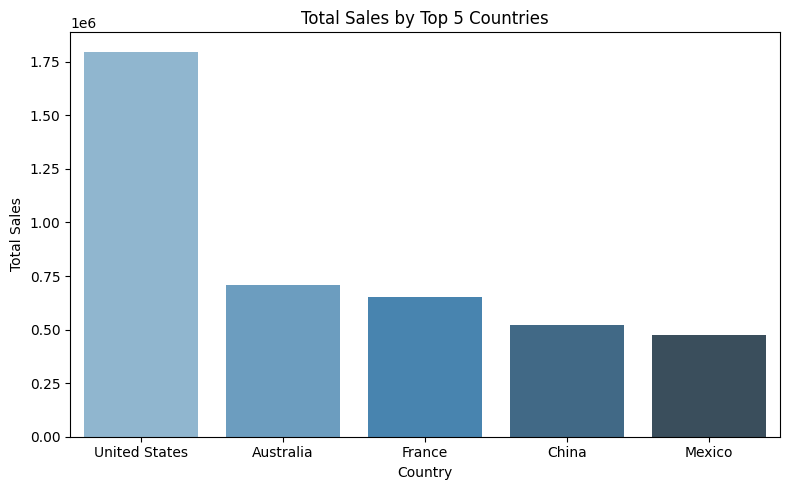

In [14]:
# Penjualan berdasarkan Negara top 5
sales_by_country_top5 = df.groupby('country')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(5).reset_index(drop=True)
print(sales_by_country_top5)
plt.figure(figsize=(8,5))
sns.barplot(x='country', y='sales', data=sales_by_country_top5, palette='Blues_d')
plt.title('Total Sales by Top 5 Countries')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

         country  sales
0     The Gambia  19.98
1       Suriname  23.64
2         Belize  57.72
3           Oman  61.08
4  French Guiana  92.30


/tmp/ipython-input-15-2393221097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='sales', data=sales_by_country_bottom5, palette='Blues_d')


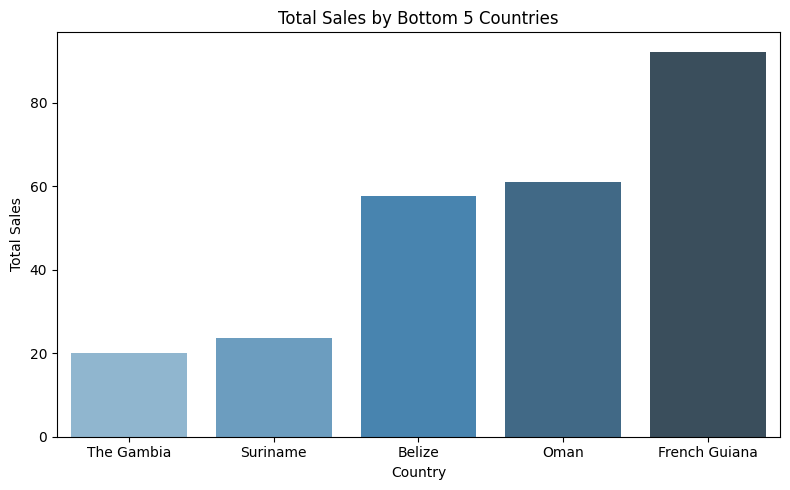

In [15]:
# Penjualan berdasarkan Negara bottom 5
sales_by_country_bottom5 = df.groupby('country')['sales'].sum().reset_index().sort_values(by='sales', ascending=True).head(5).reset_index(drop=True)
print(sales_by_country_bottom5)
plt.figure(figsize=(8,5))
sns.barplot(x='country', y='sales', data=sales_by_country_bottom5, palette='Blues_d')
plt.title('Total Sales by Bottom 5 Countries')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

         country  total_corporate
0  United States             1514
1         France              455
2      Australia              433
3         Mexico              401
4        Germany              289


/tmp/ipython-input-16-1957947472.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corporate_by_country.head(5), y='total_corporate', x='country', palette='Blues_d')


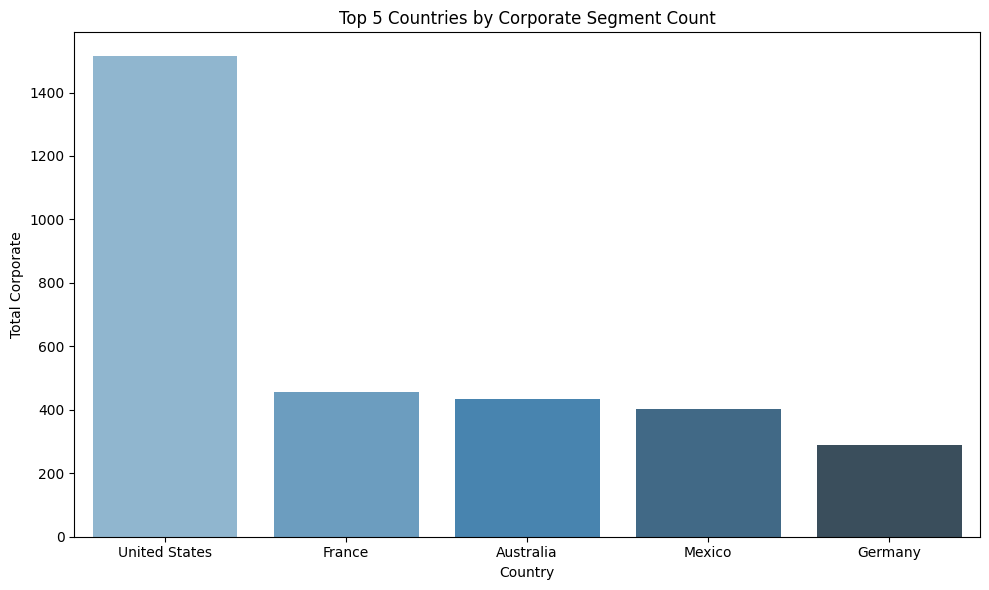

In [16]:
# Filter hanya data dengan segment 'Corporate'
corporate_data = df[df['segment'] == 'Corporate']

# Hitung jumlah data Corporate per country
corporate_by_country = (corporate_data['country'].value_counts().reset_index().rename(columns={'count': 'total_corporate'}))

# Tampilkan 5 negara teratas
print(corporate_by_country.head(5))

plt.figure(figsize=(10,6))
sns.barplot(data=corporate_by_country.head(5), y='total_corporate', x='country', palette='Blues_d')
plt.title('Top 5 Countries by Corporate Segment Count')
plt.ylabel('Total Corporate')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

         country  total_home_office
0  United States                909
1         France                255
2      Australia                243
3         Mexico                224
4        Germany                179


/tmp/ipython-input-17-2985302385.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=home_office_data_by_country.head(5), y='total_home_office', x='country', palette='Blues_d')


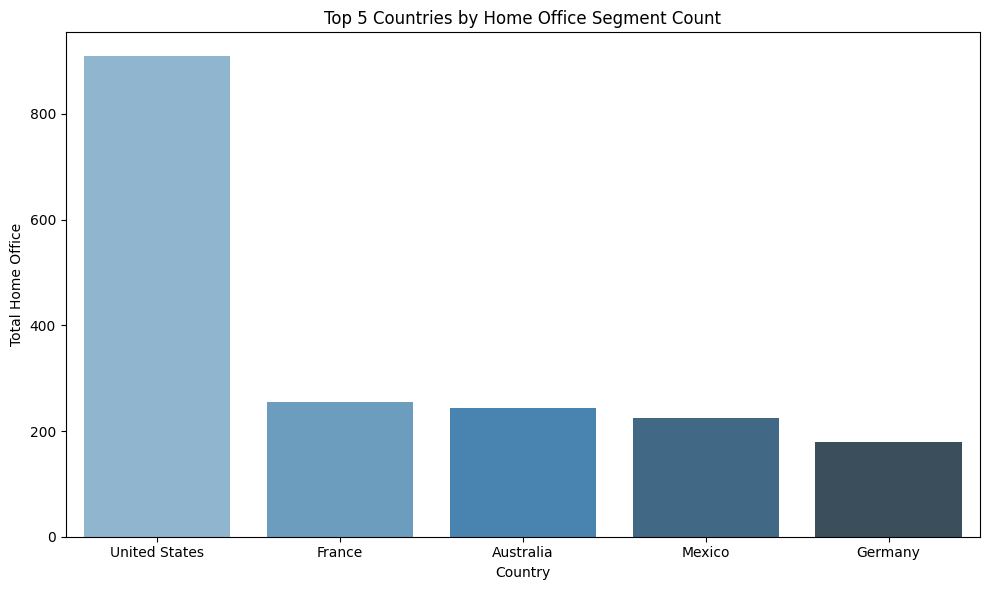

In [17]:
# Filter hanya data dengan segment 'Home Office'
home_office_data = df[df['segment'] == 'Home Office']

# Hitung jumlah data Home Office per country
home_office_data_by_country = (home_office_data['country'].value_counts().reset_index().rename(columns={'count': 'total_home_office'}))

# Tampilkan 5 negara teratas
print(home_office_data_by_country.head(5))

#
plt.figure(figsize=(10,6))
sns.barplot(data=home_office_data_by_country.head(5), y='total_home_office', x='country', palette='Blues_d')
plt.title('Top 5 Countries by Home Office Segment Count')
plt.ylabel('Total Home Office')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

         country  total_consumer
0  United States            2586
1         France             763
2      Australia             743
3         Mexico             697
4        Germany             550


/tmp/ipython-input-18-3947639328.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consumer_data_by_country.head(5), y='total_consumer', x='country', palette='Blues_d')


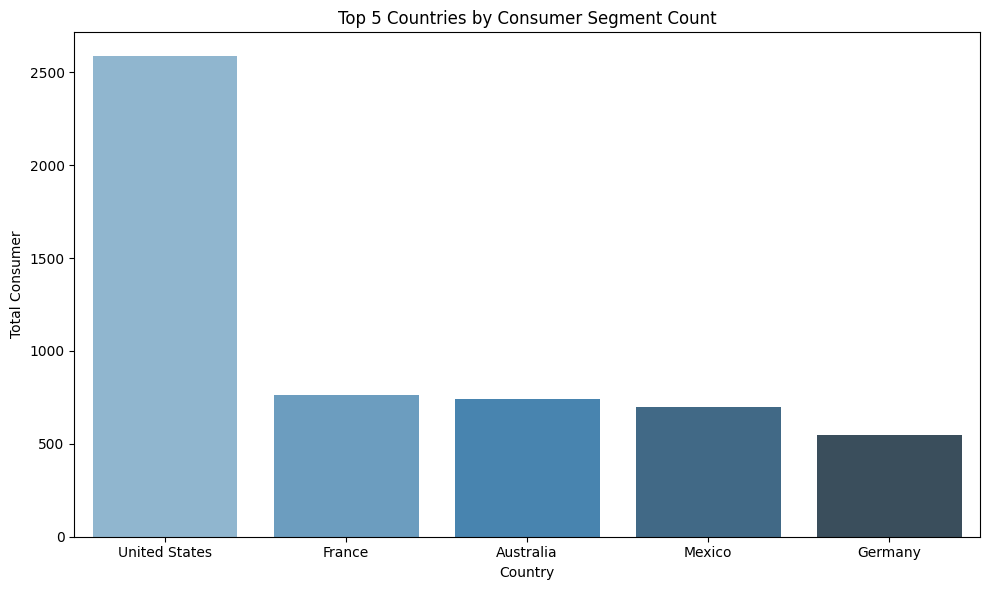

In [18]:
# Filter hanya data dengan segment 'Consumer'
consumer_data = df[df['segment'] == 'Consumer']

# Hitung jumlah data Home Office per country
consumer_data_by_country = (consumer_data['country'].value_counts().reset_index().rename(columns={'count': 'total_consumer'}))

# Tampilkan 5 negara teratas
print(consumer_data_by_country.head(5))

#
plt.figure(figsize=(10,6))
sns.barplot(data=consumer_data_by_country.head(5), y='total_consumer', x='country', palette='Blues_d')
plt.title('Top 5 Countries by Consumer Segment Count')
plt.ylabel('Total Consumer')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-979508823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_by_subcat, x='discount', y='sub-category', palette='Blues_d')


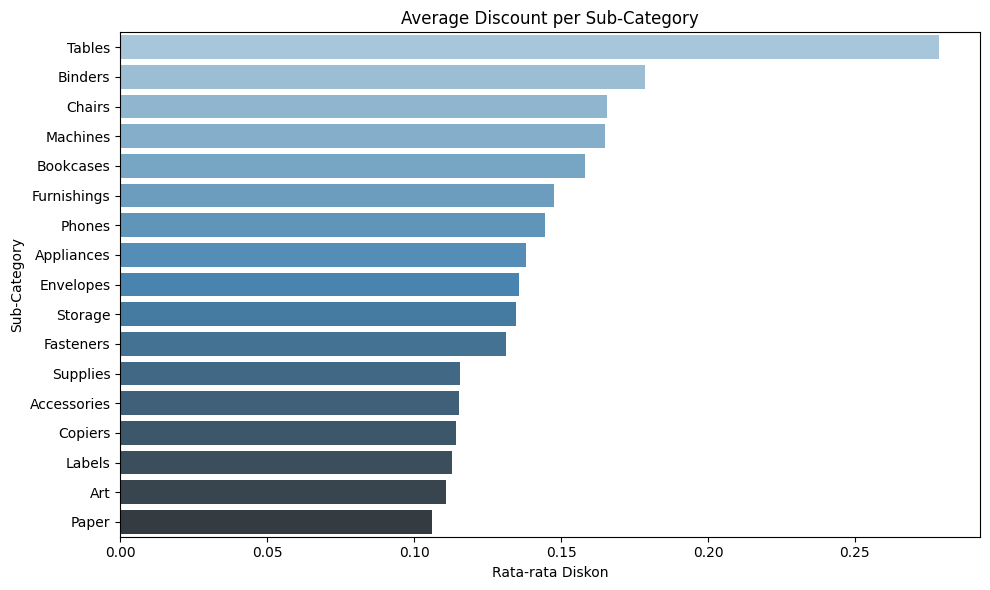

In [19]:
discount_by_subcat = df.groupby('sub-category')['discount'].mean().reset_index().sort_values(by='discount', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=discount_by_subcat, x='discount', y='sub-category', palette='Blues_d')
plt.title('Average Discount per Sub-Category')
plt.xlabel('Rata-rata Diskon')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()